In [19]:
%reset
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import dill
import sys, os
from astropy.io import fits
import scipy.interpolate as interpolate
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/cosmosis_code/')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis'
font = {'size': 18}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

import matplotlib
import matplotlib.pyplot as pl
font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')


import pickle as pk
%load_ext autoreload
%autoreload 2




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/theoryDV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_OAGN_theorycov.fits')   

df.info()


Filename: /global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/theoryDV_obj_temp_kk_gty_theoryDV_Planck_cosmos_B12_OAGN_theorycov.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (560, 560)   float64   
  2  xip           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  3  xim           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  4  compton_shear    1 BinTableHDU     29   80R x 5C   [K, K, K, D, D]   
  5  compton1_shear    1 BinTableHDU     29   80R x 5C   [K, K, K, D, D]   
  6  nz_source     1 BinTableHDU     24   300R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     24   300R x 7C   [D, D, D, D, D, D, D]   


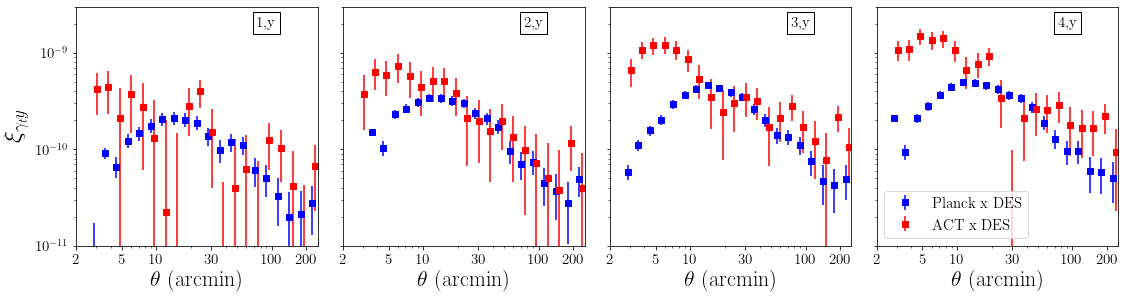

In [4]:
# from twobessel import *
# import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
from astropy.io import fits
import pickle as pk
import numpy as np

# df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')

df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   


# desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(1,4, figsize = (16,4.5),sharex=True,sharey='row')
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

           
        yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
        yk_val = df['compton_shear'].data['VALUE'][ind_sely]
        yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))            

        yk_th_g1 = df['compton1_shear'].data['ANG'][ind_sely1]
        yk_val1 = df['compton1_shear'].data['VALUE'][ind_sely1]
        yk_err1 = np.sqrt(np.diag(df['COVMAT'].data[480:,480:][ind_sely1,:][:,ind_sely1]))            

        ax[j2].errorbar(yk_th_g,yk_val, yk_err, ls='',marker='s',color='blue',label='Planck x DES')
        ax[j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='s',color='red',label='ACT x DES')

        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
        ticks  = np.array([2,5,10,30,100,200])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2,250))
        ax[j2].set_ylim((1e-11,3e-9))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{\gamma_t y}$ ', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[3].legend(fontsize=15,loc='lower left')
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

fig.savefig('xi_ygt_planck_act_measurement_actmask.pdf')











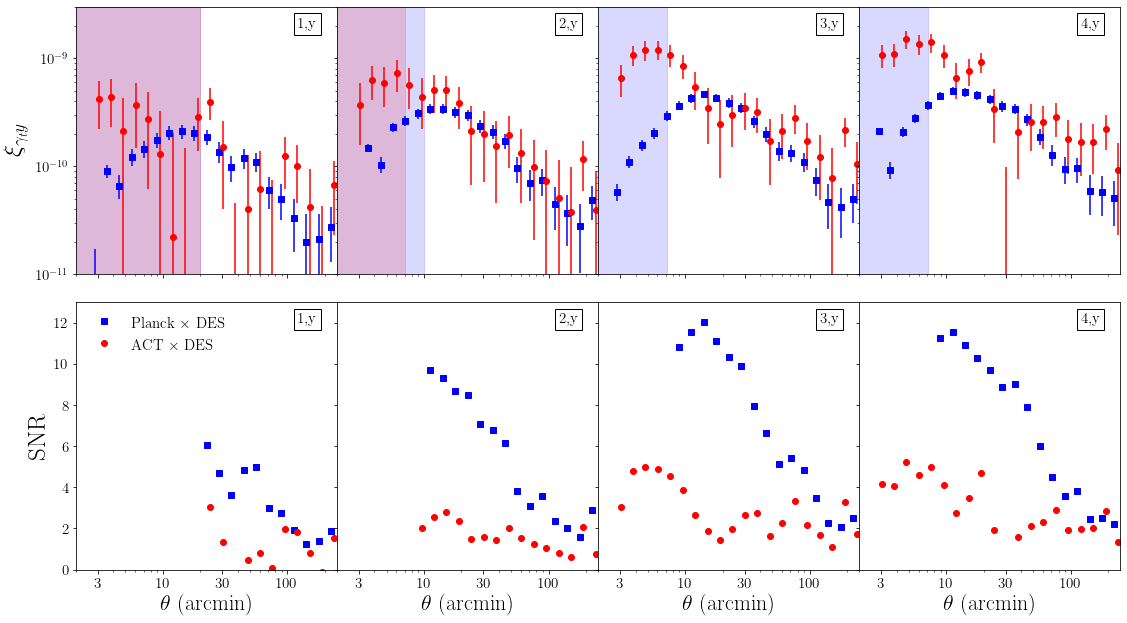

In [60]:
# from twobessel import *
# import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
from astropy.io import fits
import pickle as pk
import numpy as np

# df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')

df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   


# desy1 = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/v0.40_fiducial.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
# bins2 = np.array([4,4,4,4])
bins2 = np.array([1,2,3,4])

# bins2 = np.array([2,2,2,2])
fig, ax = pl.subplots(2,4, figsize = (16,9),sharex=True,sharey='row', gridspec_kw = {'wspace':0})   
jc = 0
# texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
sc1 = [20,7.1,1.1,1.1]
sc = [20,10.,7.1,7.1]

for j1 in range(1):    
    for j2 in range(4):
                
        bin1y = df['compton_shear'].data['BIN1']
        bin2y = df['compton_shear'].data['BIN2']
        ind_sely = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

        bin1y = df['compton1_shear'].data['BIN1']
        bin2y = df['compton1_shear'].data['BIN2']
        ind_sely1 = np.where((bin1y == bins1[j2]) & (bin2y == bins2[j2]))[0]

           
        yk_th_g = df['compton_shear'].data['ANG'][ind_sely]
        yk_val = df['compton_shear'].data['VALUE'][ind_sely]
        yk_err = np.sqrt(np.diag(df['COVMAT'].data[400:480,400:480][ind_sely,:][:,ind_sely]))            

        yk_th_g1 = df['compton1_shear'].data['ANG'][ind_sely1]
        yk_val1 = df['compton1_shear'].data['VALUE'][ind_sely1]
        yk_err1 = np.sqrt(np.diag(df['COVMAT'].data[480:,480:][ind_sely1,:][:,ind_sely1]))            

        ax[0,j2].errorbar(yk_th_g,yk_val, yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ DES')
        ax[0,j2].errorbar(1.07*yk_th_g1, yk_val1,yk_err1, ls='',marker='o',color='red',label=r'ACT $\times$ DES')
        ax[0,j2].axvspan(0,sc[j2],alpha=0.15,color='b')
        ax[0,j2].axvspan(0,sc1[j2],alpha=0.15,color='r')
        
        ind_sel = np.where(yk_th_g > sc[j2])[0]
        ax[1,j2].errorbar(yk_th_g[ind_sel],(yk_val/yk_err)[ind_sel], ls='',marker='s',color='blue',label=r'Planck $\times$ DES')
        ind_sel1 = np.where(yk_th_g1 > sc1[j2])[0]
        ax[1,j2].errorbar(1.07*yk_th_g1[ind_sel1], (yk_val1/yk_err1)[ind_sel1], ls='',marker='o',color='red',label=r'ACT $\times$ DES')  
        
        
        ax[0,j2].set_xscale('log')
        ax[0,j2].set_yscale('log')
        
        ax[1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 22)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[1,j2].set_xticks(ticks)
        ax[0,j2].set_xticks(ticks)
        ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[0,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[0,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[1,j2].tick_params(axis='both', which='major', labelsize=15)
        
        ax[0,j2].set_xlim((2,250))
        ax[0,j2].set_ylim((1e-11,3e-9))
        ax[1,j2].set_ylim((0,13))
        
        ax[0,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1



# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{\gamma_t y}$ ', size = 25)
ax[1,0].set_ylabel(r'SNR', size = 25)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\sigma(\xi_{+},\xi_{+})$ ', size = 22)
# ax[2,0].set_ylabel(r'$\sigma(\xi_{-},\xi_{-})$ ', size = 22)
ax[1,0].legend(fontsize=15,loc='upper left',frameon=False)
# ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)

pl.tight_layout()

fig.savefig('xi_ygt_planck_act_measurement_SNR.pdf')



In [8]:
cuts_min = [[20,40],[10,40],[7,40],[7,40]]
cuts_max = [[30,250],[30,250],[30,250],[30,250]]

def get_chi2(binv,cuts_min, cuts_max, angv,data, theory,cov_bin):
    if len(cuts_min) > 1:
        selec1 = np.where((angv > cuts_min[0]) & (angv < cuts_max[0]))[0]
        selec2 = np.where((angv > cuts_min[1]) & (angv < cuts_max[1]))[0]
        selection = np.hstack((selec1, selec2))
    else:
        selection = np.where((angv > cuts_min[0]) & (angv < cuts_max[0]))[0]
    
    cov_selec = (cov_bin[:, selection])[selection, :]
    data_selec = data[selection]
    theory_selec = theory[selection]
    diff_selec = (data_selec - theory_selec)
    inv_cov_selec = np.linalg.inv(cov_selec)
    chi2 = np.dot(diff_selec, np.dot(inv_cov_selec, diff_selec))
    return chi2


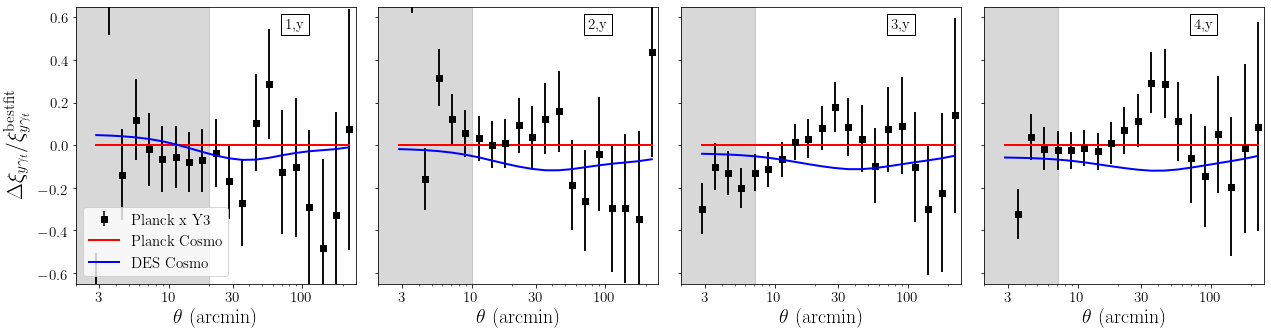

In [102]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
# ytype = 'act'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1

if ytype == 'act':
    fnames = [
        
                'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.pk',

#         'DV_MAP_gty_only_HM_delz_m_IA_P0A_P0z_P0m_betaA_betaz_betam_al1_PLcosmo_finalrun2.pk'
    ]
    yt = 2
    from astropy.io import fits
    actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   
    
    bin1_gty = actf['compton1_shear'].data['BIN1']
    bin2_gty = actf['compton1_shear'].data['BIN2']
    gty_csf = actf['compton1_shear'].data['VALUE']
    gty_ang = actf['compton1_shear'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
    gty_cov = actf['COVMAT'].data[480:,:][:,480:]
    label_yx = 'ACT x Y3'
    ylims = [-1.2,1.2]
    sc = [20,10,1.1,1.1]

if ytype == 'planck':
    fnames = [
                'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.pk',
#         'DV_MAP_gty_only_HM_delz_m_IA_P0A_P0z_P0m_betaA_betaz_betam_al1_PLcosmo_finalrun2.pk'
    ]
    yt = 1
    from astropy.io import fits
    actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

    bin1_gty = actf['compton_shear'].data['BIN1']
    bin2_gty = actf['compton_shear'].data['BIN2']
    gty_csf = actf['compton_shear'].data['VALUE']
    gty_ang = actf['compton_shear'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
    gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
    label_yx = 'Planck x Y3'
    ylims = [-0.65,0.65]
    
    sc = [20,10,7.1,7.1]
    
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        theta_array = DV.xi_result_dict['gty']['theta']
        bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)

        Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
        sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]
#         yk_g = df['Yshear_y3'][str(j2)]['xip']
#         yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
#         yk_err = df['Yshear_y3'][str(j2)]['err_p']
        yk_g = gty_csf[sel_ind]
        yk_th_g = gty_ang[sel_ind]
        yk_err = gty_sig[sel_ind]
        cov_bin = gty_cov[sel_ind,:][:,sel_ind]
        inv_cov_bin = np.linalg.inv(cov_bin)

#         print(theta_array)

        if do_residuals:
            Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

            Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
            if jf == 0:
                Cl_d_th_ref = Cl_d_th

#             if show_chi2:                
#                 diff = np.array([yk_g - Cl_d_th])
#                 snr_bin = np.sqrt(np.dot(diff,np.dot(inv_cov_bin,diff.T)))
#                 print(labels[jf])
#                 print(str(np.round(snr_bin[0][0],1)) + ' sigma'
            
            if jf == 0 and j2 == 0:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')
            
            if ((jf in [0,1,2]) and (j2 == 0)) or ((jf == 0) and (j2 == 1)):
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            else:
                ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf])  
        else:
            if jf == 0:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
            else:
                ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')
    

            ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
            if show_1h2h:
                Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
                Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
                ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
                ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

        ax[j2].axvspan(0,sc[j2],alpha=0.08,color='k')
        ax[j2].set_xscale('log')

        if do_residuals:
            ax[j2].set_ylim(ylims)        
        else:
            ax[j2].set_yscale('log')
            ax[j2].set_ylim(1e-11,2e-9)


        ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([3,10,30,100])
        labels_bottom = ticks
        ax[j2].set_xticks(ticks)
        ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[0].legend(fontsize=15,loc='lower left')
#     ax[1].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_sims_residual_' + str(ytype) + '.pdf')






In [67]:
dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_planck_data_mead.pkl','rb'))   
dfb['dv']


[{0: {'bin_1_0': {'tot': array([2.43375842e-11, 3.70158991e-11, 5.50341551e-11, 7.90863117e-11,
           1.08193419e-10, 1.38384230e-10, 1.62729956e-10, 1.74579921e-10,
           1.72187787e-10, 1.59114300e-10, 1.40352044e-10, 1.19630200e-10,
           9.93327890e-11, 8.10150074e-11, 6.55480000e-11, 5.31290289e-11,
           4.33846217e-11, 3.56878133e-11, 2.94005739e-11, 2.40251700e-11])},
   'theta': array([  2.80504614,   3.53134386,   4.44569853,   5.59680285,
            7.04595733,   8.87033473,  11.1670898 ,  14.05853313,
           17.69864461,  22.28127345,  28.05046136,  35.31343862,
           44.45698525,  55.96802846,  70.45957328,  88.70334731,
          111.67089804, 140.5853313 , 176.9864461 , 222.81273453]),
   'bin_2_0': {'tot': array([4.85932792e-11, 7.36958260e-11, 1.09076357e-10, 1.55648291e-10,
           2.10637746e-10, 2.65072201e-10, 3.04594310e-10, 3.17211967e-10,
           3.02767640e-10, 2.71519899e-10, 2.34231199e-10, 1.97207117e-10,
           1.6333

[-0.65, 0.65]


[-0.65, 0.65]


[-0.65, 0.65]
[-0.65, 0.65]


[-1.2, 1.2]


[-1.2, 1.2]


[-1.2, 1.2]
[-1.2, 1.2]


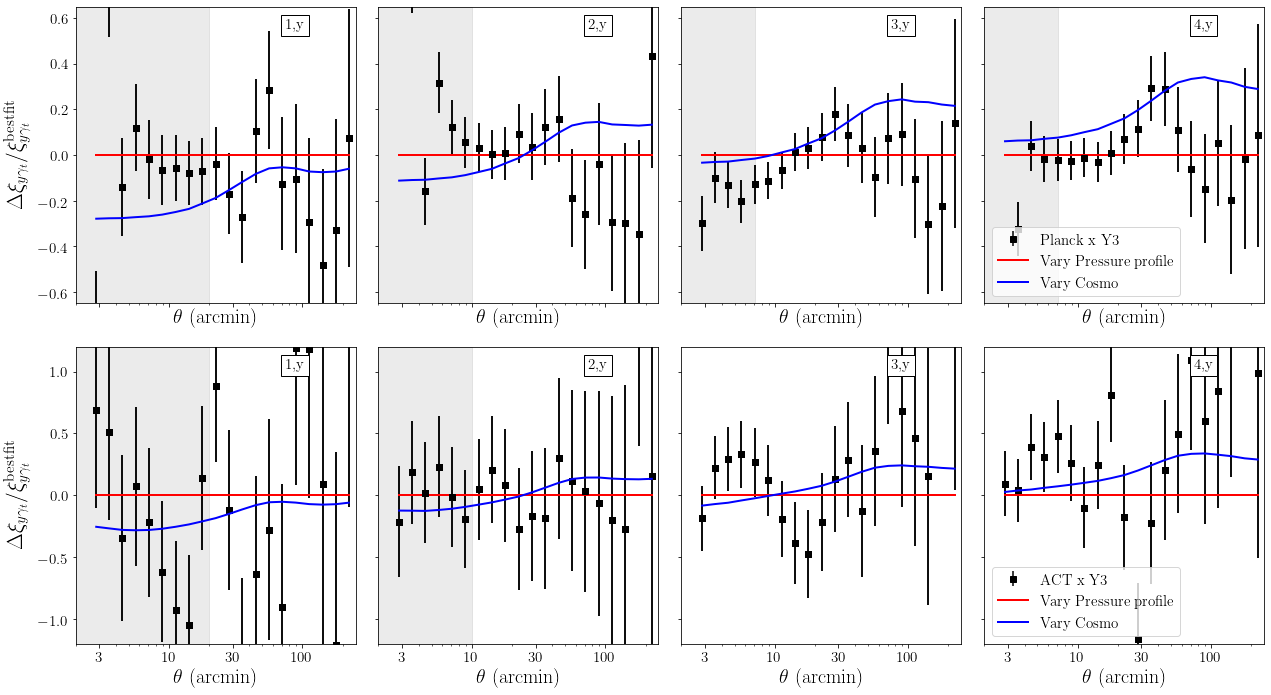

In [84]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ytype = 'planck'
cosmotype = 'PL'
# cosmotype = 'DES'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1


    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(2,4, figsize = (18,10),sharex=True,sharey='row')

for j1 in range(2):
    ax = ax_all[j1]
    if cosmotype == 'PL':
        fnames = ['DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk']
        dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_planck_data_mead.pkl','rb'))   
    if cosmotype == 'DES':
        fnames = ['DV_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.pk'] 
        dfb = pk.load(open('/global/cfs/cdirs/des/data_actxdes/bestfit_marco/best_fit_marg_B12_DES_data_mead.pkl','rb'))  
    if j1 == 1:        
        yt = 2
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton1_shear'].data['BIN1']
        bin2_gty = actf['compton1_shear'].data['BIN2']
        gty_csf = actf['compton1_shear'].data['VALUE']
        gty_ang = actf['compton1_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[480:])
        gty_cov = actf['COVMAT'].data[480:,:][:,480:]
        label_yx = 'ACT x Y3'
        ylims = [-1.2,1.2]
        sc = [20,10,1.1,1.1]

    if j1 == 0:
        yt = 1
        from astropy.io import fits
        actf = df = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov.fits')   

        bin1_gty = actf['compton_shear'].data['BIN1']
        bin2_gty = actf['compton_shear'].data['BIN2']
        gty_csf = actf['compton_shear'].data['VALUE']
        gty_ang = actf['compton_shear'].data['ANG']
        gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[400:480])
        gty_cov = actf['COVMAT'].data[400:480,:][:,400:480]
        label_yx = 'Planck x Y3'
        ylims = [-0.65,0.65]

        sc = [20,10,7.1,7.1]

    
    for j2 in range(4):
        for jf in range(len(fnames)):

            DV = dill.load(open(fdir + fnames[jf],'rb'))  

            jc = 0
            texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
            texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
            theta_array = DV.xi_result_dict['gty']['theta']
            bin_str = 'yt_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
            
            Cl_j1_tot = DV.xi_result_dict['gty'][bin_str]['tot']
            
            theta_jfb = dfb['dv'][0][j1]['theta']
            Cl_jfb_tot = dfb['dv'][0][j1]['bin_' + str(j2+1) + '_' + str(0)]['tot']
            
            sel_ind = np.where((bin1_gty == j2+1) & (bin2_gty == j2+1))[0]

            yk_g = gty_csf[sel_ind]
            yk_th_g = gty_ang[sel_ind]
            yk_err = gty_sig[sel_ind]
            cov_bin = gty_cov[sel_ind,:][:,sel_ind]
            inv_cov_bin = np.linalg.inv(cov_bin)


            if do_residuals:
                for jp in range(2):
                    if jp == 0:
                        Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')
                        Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                        label_jp = 'Vary Pressure profile'
                        color_jp = 'r'
                    else:
                        Cl_interp = interpolate.interp1d(np.log(theta_jfb), np.log(Cl_jfb_tot),fill_value='extrapolate')
                        Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))    
                        label_jp = 'Vary Cosmo'
                        color_jp = 'b'
                    if jp == 0:
                        Cl_d_th_ref = Cl_d_th

                    if jf == 0 and jp == 0:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
                    else:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')

                    if ((jf in [0,1,2])):
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color_jp,label=label_jp)  
                    else:
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =color_jp)  
                        
            else:
                if jf == 0:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                else:
                    ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
                if show_1h2h:
                    Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
                    Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
                    ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
                    ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

            ax[j2].axvspan(0,sc[j2],alpha=0.08,color='k')
            ax[j2].set_xscale('log')

            if do_residuals:
                print(ylims)
                ax[j2].set_ylim(ylims)        
            else:
                ax[j2].set_yscale('log')
                ax[j2].set_ylim(1e-11,2e-9)


            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([3,10,30,100])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

            ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
            ax[j2].tick_params(axis='both', which='major', labelsize=15)
            ax[j2].set_xlim((2,250))
            ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


            jc += 1

        # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
        if do_residuals:
            ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
        else:
            ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
        # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
        # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
        ax[3].legend(fontsize=15,loc='lower left')
    #     ax[1].legend(fontsize=15,loc='lower left')
        #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('gty_residual_vary_cosmo_varyP_' + str(cosmotype) + '.pdf')






/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:169: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


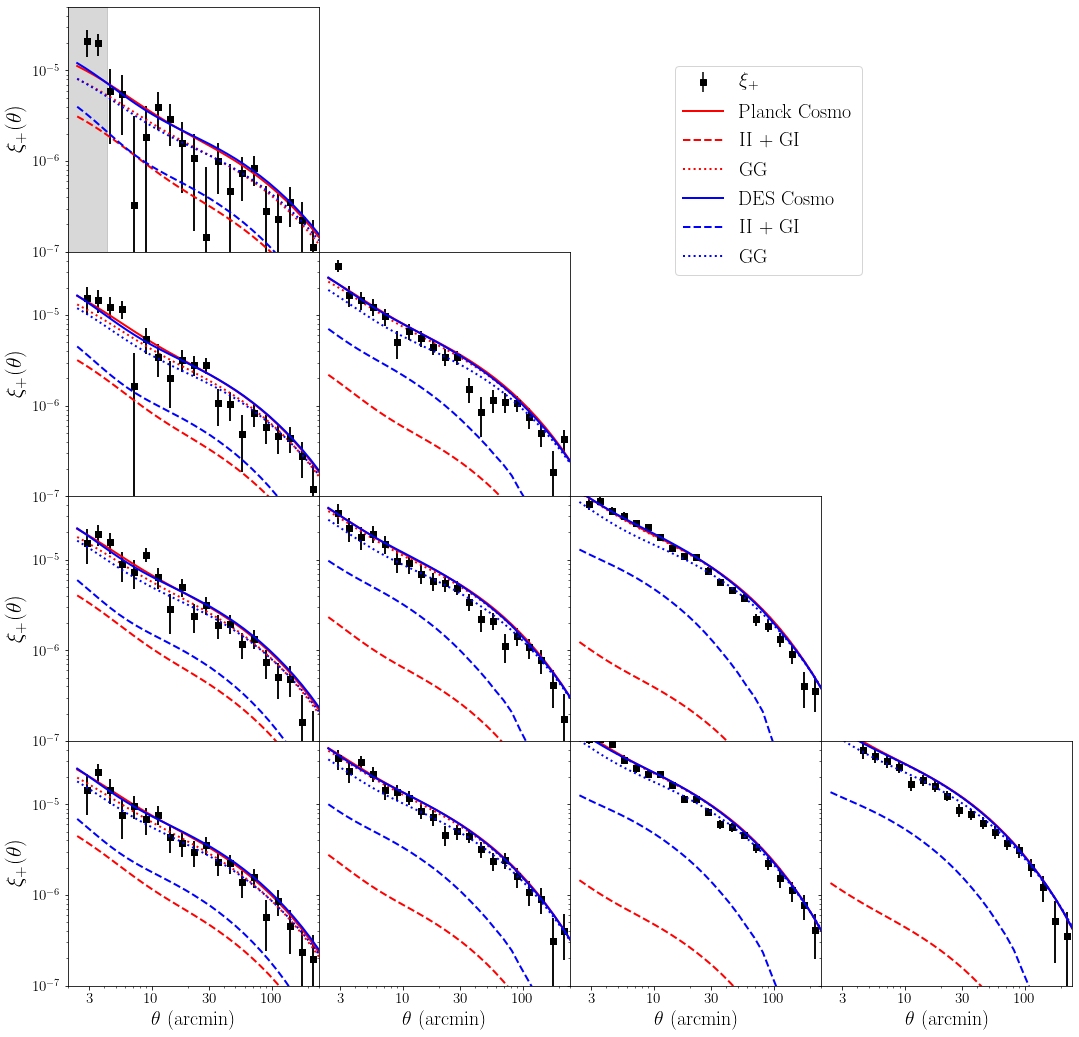

In [51]:
import configparser
config = configparser.ConfigParser()
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
ptype = 'xip'
# ptype = 'xim'
# ytype = 'act'
do_residuals = 0
show_1h2h = 1
show_IA = 1
show_chi2 = 1
scf = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/scale_cuts/scales_gty_fid_xipxim_y3_finalrun3.ini'  
config.read(scf)
# print()

if ptype == 'xip':
    fnames = [
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_DEScosmo_finalrun3.pk',
    ]
    yt = 2
    from astropy.io import fits
    actf = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits')   
    
    bin1_gty = actf['xip'].data['BIN1']
    bin2_gty = actf['xip'].data['BIN2']
    gty_csf = actf['xip'].data['VALUE']
    gty_ang = actf['xip'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[0:200])
    gty_cov = actf['COVMAT'].data[0:200,:][:,0:200]
    label_yx = r'$\xi_{+}$'
    ylims = [-1.2,1.2]
#     sc = [20,10,1.1,1.1]

if ptype == 'xim':
    fnames = [
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.pk',
        'DV_MAP_values_xipm_fidcuts_HM_delz_m_IA_al1_DEScosmo_finalrun3.pk',
    ]
    yt = 1
    from astropy.io import fits
    actf = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits')   

    bin1_gty = actf['xim'].data['BIN1']
    bin2_gty = actf['xim'].data['BIN2']
    gty_csf = actf['xim'].data['VALUE']
    gty_ang = actf['xim'].data['ANG']
    gty_sig = np.sqrt(np.diag(actf['COVMAT'].data)[200:400])
    gty_cov = actf['COVMAT'].data[200:400,:][:,200:400]
    label_yx = r'$\xi_{-}$'
    ylims = [-1.5,1.5]
    
    sc = [20,10,7.1,7.1]
    
    
labels = ['Planck Cosmo','DES Cosmo','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax_all = pl.subplots(4,4, figsize = (18,18),sharex=True,sharey='row',gridspec_kw={'hspace':0.0,'wspace':0.0})
for j1 in range(4):
    ax = ax_all[j1]
    for j2 in range(4):
        if j1 < j2:
            fig.delaxes(ax_all[j1,j2])
        else:
            for jf in range(len(fnames)):

                DV = dill.load(open(fdir + fnames[jf],'rb'))  

                jc = 0
                theta_array = DV.xi_result_dict['kk']['theta']
                bin_str = 'bin_' + str(j2+1) + '_' + str(j1+1)
                if ptype == 'xip':
                    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['tot']
                if ptype == 'xim':
                    Cl_j1_tot = DV.xi_result_dict['kk'][bin_str]['totm']

                sel_ind = np.where((bin1_gty == j1+1) & (bin2_gty == j2+1))[0]
                yk_g = gty_csf[sel_ind]
                yk_th_g = gty_ang[sel_ind]
                yk_err = gty_sig[sel_ind]
                cov_bin = gty_cov[sel_ind,:][:,sel_ind]
                inv_cov_bin = np.linalg.inv(cov_bin)

                if do_residuals:
                    Cl_interp = interpolate.interp1d(np.log(theta_array), np.log(Cl_j1_tot),fill_value='extrapolate')

                    Cl_d_th = np.exp(Cl_interp(np.log(yk_th_g)))
                    if jf == 0:
                        Cl_d_th_ref = Cl_d_th


                    if jf == 0 and j2 == 0:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref ,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black',label=label_yx)
                    else:
                        ax[j2].errorbar(yk_th_g, (yk_g - Cl_d_th_ref)/Cl_d_th_ref,yerr=yk_err/Cl_d_th_ref, ls='',marker='s',color='black')

                    if ((jf in [0,1,2]) and (j2 == 0)) or ((jf == 0) and (j2 == 1)):
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
                    else:
                        ax[j2].errorbar(yk_th_g, (Cl_d_th/Cl_d_th_ref) -1 , linestyle='-', marker='',lw = 2, color =colors[jf])  
                else:
                    if jf == 0:
                        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black',label=label_yx)
                    else:
                        ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='black')


                    ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  
#                     if show_1h2h:
#                         Cl_j1_1h = DV.xi_result_dict['gty'][bin_str]['1h']
#                         Cl_j1_2h = DV.xi_result_dict['gty'][bin_str]['2h']
#                         ax[j2].errorbar(theta_array, Cl_j1_1h, linestyle='--', marker='',lw = 2, color =colors[jf],label='1-halo')  
#                         ax[j2].errorbar(theta_array, Cl_j1_2h, linestyle=':', marker='',lw = 2, color =colors[jf],label='2-halo')  

                    if show_IA:
                        if ptype == 'xip':
                            Cl_j1_IA = DV.xi_result_dict['kk'][bin_str]['int']
                            Cl_j1_phy = DV.xi_result_dict['kk'][bin_str]['phy']
                        if ptype == 'xim':
                            Cl_j1_IA = DV.xi_result_dict['kk'][bin_str]['intm']
                            Cl_j1_phy = DV.xi_result_dict['kk'][bin_str]['phym']

                        ax[j2].errorbar(theta_array, Cl_j1_IA, linestyle='--', marker='',lw = 2, color =colors[jf],label='II + GI')  
                        ax[j2].errorbar(theta_array, Cl_j1_phy, linestyle=':', marker='',lw = 2, color =colors[jf],label='GG')  


                scv = list(map(float,config['2pt_like']['angle_range_' + str(ptype) + '_' + str(j2+1) + '_' + str(j1+1)].split()))[0] 
                ax[j2].axvspan(0,scv,alpha=0.08,color='k')
                ax[j2].set_xscale('log')

                if do_residuals:
                    ax[j2].set_ylim(ylims)        
                else:
                    ax[j2].set_yscale('log')
                    ax[j2].set_ylim(1e-7,5e-5)

                if j1 == 3:
                    ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
                ticks  = np.array([3,10,30,100])
                labels_bottom = ticks
                ax[j2].set_xticks(ticks)
                ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

                ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
                ax[j2].tick_params(axis='both', which='major', labelsize=15)
                ax[j2].set_xlim((2,250))
#                 ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


                jc += 1

            # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
            if do_residuals:
                if ptype == 'xip':
                    ax[0].set_ylabel(r'$\Delta \xi_{+}/\xi^{\rm bestfit}_{+}$ ', size = 22)
                if ptype == 'xim':
                    ax[0].set_ylabel(r'$\Delta \xi_{-}/\xi^{\rm bestfit}_{-}$ ', size = 22)
                
            else:
                if ptype == 'xip':
                    ax[0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
                if ptype == 'xim':
                    ax[0].set_ylabel(r'$\xi_{-}(\theta)$ ', size = 22)
ax_all[0,0].legend(fontsize=20, bbox_to_anchor=(3.2, 0.8))
pl.tight_layout()

fig.savefig(ptype + '_residual_' + 'chain_xipm_only_wIA' + '.pdf')






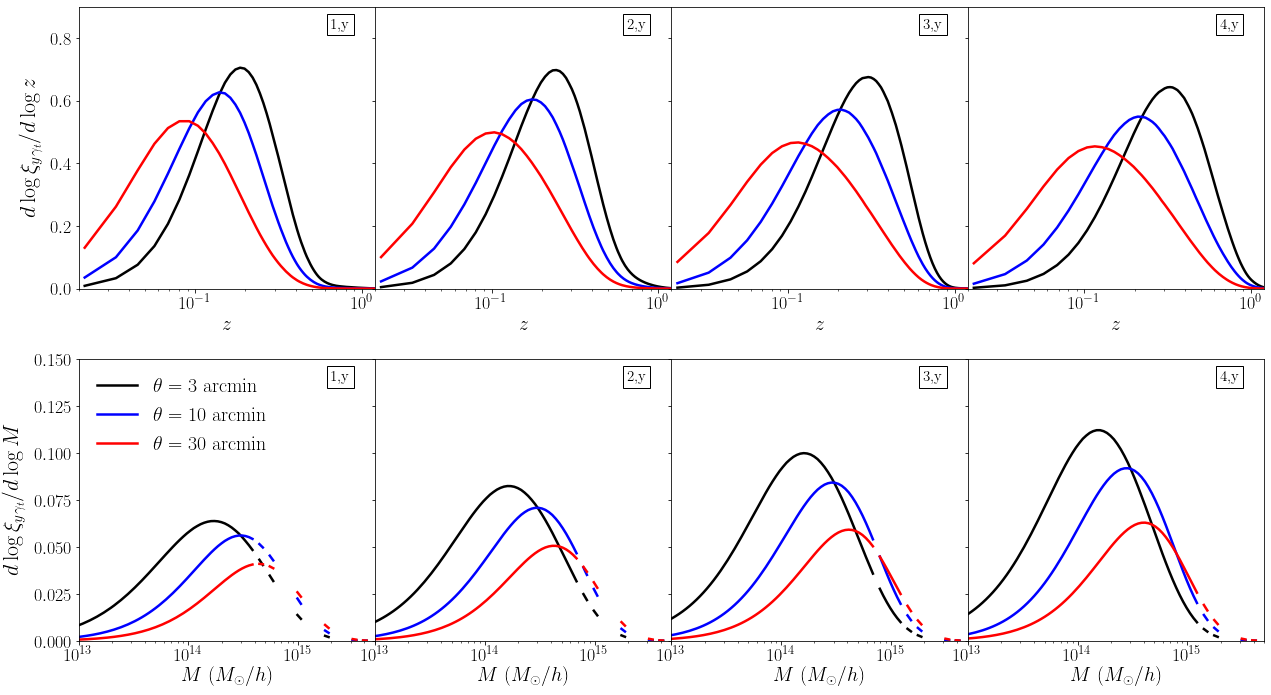

In [61]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
# fdir = '/global/cfs/cdirs/des/data_actxdes/'
import scipy.interpolate as interpolate
# ytype = 'planck'
ytype = 'act'
do_residuals = 1
show_1h2h = 1
show_chi2 = 1

if ytype == 'act':
    fnames = [
        'DV_logsens_zM.pk',
    ]
    yt = 2


if ytype == 'planck':
    fnames = [
        'DV_logsens_zM.pk',
    ]
    yt = 1

    
labels = ['Best Fit','OWLS Ref','OWLS AGN']
# labels = ['Mead',r'$R_{\rm max}/R_{\rm 200c} = 3$',r'$R_{\rm max}/R_{\rm 200c} = 2$']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (18,10),sharex='row',sharey='row', gridspec_kw = {'wspace':0})
# thbin = 2
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        bin_strz = 'sensz_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
        bin_strM = 'sensM_' + str(yt) + 'bin_' + str(j2+1) + '_' + str(0)
        sensz = DV.xi_gty_log_sens_zM[bin_strz]
        sensM = DV.xi_gty_log_sens_zM[bin_strM]
        M_array = DV.xi_gty_log_sens_zM['M_array']
        z_array = DV.xi_gty_log_sens_zM['z_array']
        theta_array = DV.xi_gty_log_sens_zM['theta']
        thbin = np.where(theta_array > 3)[0][0]
        ax[0,j2].errorbar(z_array, sensz[thbin,:], lw=2.5, ls='-',marker='',color='black',label=r'$\theta = 3$ arcmin')
        ax[1,j2].errorbar(M_array, sensM[thbin,:], lw=2.5,ls='-',marker='',color='black',label=r'$\theta = 3$ arcmin')

        thbin = np.where(theta_array > 10)[0][0]
        ax[0,j2].errorbar(z_array, sensz[thbin,:], lw=2.5,ls='-',marker='',color='blue',label=r'$\theta = 10$ arcmin')
        ax[1,j2].errorbar(M_array, sensM[thbin,:],lw=2.5, ls='-',marker='',color='blue',label=r'$\theta = 10$ arcmin')

        thbin = np.where(theta_array > 30)[0][0]
        ax[0,j2].errorbar(z_array, sensz[thbin,:], lw=2.5,ls='-',marker='',color='r',label=r'$\theta = 30$ arcmin')
        ax[1,j2].errorbar(M_array, sensM[thbin,:],lw=2.5, ls='-',marker='',color='r',label=r'$\theta = 30$ arcmin')

        ax[0,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.85, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    

        
        ax[0,j2].set_xscale('log')
        ax[1,j2].set_xscale('log')

        ax[0,j2].set_xlabel(r'$z$', size = 20)
        ax[1,j2].set_xlabel(r'$M$ ($M_{\odot}/h$)', size = 20)
        ax[0,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[1,j2].tick_params(axis='both', which='major', labelsize=18)
        jc += 1

    ax[0,0].set_ylabel(r'$d \log \xi_{y\gamma_t}/d \log z$ ', size = 22)
    ax[1,0].set_ylabel(r'$d \log \xi_{y\gamma_t}/d \log M$ ', size = 22)
    ax[0,0].set_ylim(0.0,0.9)
    ax[0,0].set_xlim(2e-2,1.2)
    ax[1,0].set_ylim(0.0,0.15)
    ax[1,0].set_xlim(1e13,5e15)
ax[1,0].legend(fontsize=20,loc='upper left',frameon=False)
pl.tight_layout()

fig.savefig('xigty_sens_zM' + '.pdf')




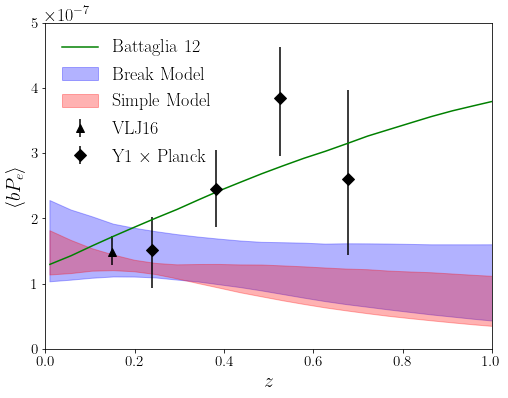

In [33]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk','rb'))  

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']


fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(df1['z'], df1['bPe_low']*(1e-3), df1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Break Model')
ax.fill_between(df2['z'], df2['bPe_low']*(1e-3), df2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
ax.plot(df1['z'], df1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
vljv = 1.49e-7
ax.errorbar([0.149],[vljv],np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
vljv = 1.512e-7
ax.errorbar([0.239],[vljv],np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],[vljv],np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],[vljv],np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],[vljv],np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\langle bP_e \rangle$', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,5e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
# fig.savefig('YM_buzzard_try.pdf')
# fig.savefig(save_plot_fname)




In [35]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/bPe_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.pk','rb'))  

def weighted_percentile(data_mat, percents, weights=None):
    weighted_mat = np.zeros(data_mat.shape[1])
    for mj in range(data_mat.shape[1]):
        data = data_mat[:, mj]
        if weights is None:
            return np.percentile(data, percents)
        ind=np.argsort(data)
        d=data[ind]
        w=weights[ind]
        p=1.*w.cumsum()/w.sum()*100
        y=np.interp(percents, p, d)
        weighted_mat[mj] = y
    return weighted_mat

def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples
chainfname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_2hcuts_delz_m_bP_PLcosmo_finalrun3.txt'
chainf = np.loadtxt(chainfname)  
bpz0 = chainf[:,-7]
bpalpha = chainf[:,-6]
nsample = get_nsample(chainfname)
weights = chainf[:,-1]
percentiles = [16.0, 84.0]
z_array = df1['z']
bp_mat = np.zeros((nsample,len(z_array)))
for js in range(nsample):
    bp_mat[js,:] = bpz0[js] + bpalpha[js] * z_array
bPe_low_2h = weighted_percentile(bp_mat, percentiles[0], weights=weights)
bPe_high_2h = weighted_percentile(bp_mat, percentiles[1], weights=weights)


    

In [40]:
chainfname = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_2hcuts_delz_m_bP_DEScosmo_finalrun3.txt'
chainf = np.loadtxt(chainfname)  
bpz0 = chainf[:,-7]
bpalpha = chainf[:,-6]
nsample = get_nsample(chainfname)
weights = chainf[:,-1]
percentiles = [16.0, 84.0]
z_array = df1['z']
bp_mat = np.zeros((nsample,len(z_array)))
for js in range(nsample):
    bp_mat[js,:] = bpz0[js] + bpalpha[js] * z_array
bPe_low_2h_DES = weighted_percentile(bp_mat, percentiles[0], weights=weights)
bPe_high_2h_DES = weighted_percentile(bp_mat, percentiles[1], weights=weights)



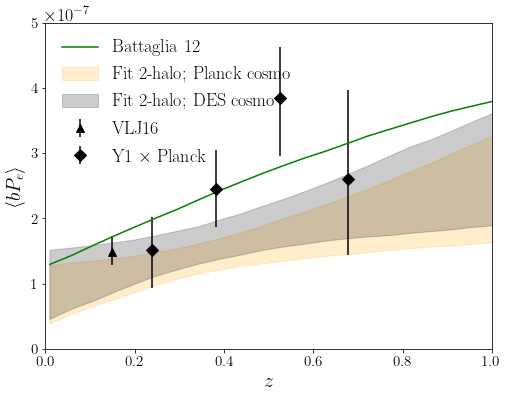

In [42]:

percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']


fig, ax = pl.subplots(1, 1, figsize=(8, 6))
# ax.fill_between(df1['z'], df1['bPe_low']*(1e-3), df1['bPe_high']*(1e-3), color='blue', alpha=alpha_list[0], label = 'Break Model')
# ax.fill_between(df2['z'], df2['bPe_low']*(1e-3), df2['bPe_high']*(1e-3), color='red', alpha=alpha_list[0], label = 'Simple Model')
ax.fill_between(df2['z'], bPe_low_2h*(1e-7), bPe_high_2h*(1e-7), color='orange', alpha=0.2, label = 'Fit 2-halo; Planck cosmo')
ax.fill_between(df2['z'], bPe_low_2h_DES*(1e-7), bPe_high_2h_DES*(1e-7), color='black', alpha=0.2, label = 'Fit 2-halo; DES cosmo')
ax.plot(df1['z'], df1['bPe_fid']*(1e-3), color='green', alpha=1.0, label = 'Battaglia 12')
vljv = 1.49e-7
ax.errorbar([0.149],[vljv],np.array([[vljv-1.28e-7,1.73e-7 - vljv]]).T,ls='',marker='^',ms='8',color='k',label='VLJ16')
vljv = 1.512e-7
ax.errorbar([0.239],[vljv],np.array([[vljv-0.9367e-7,2.025e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k',label=r'Y1 $\times$ Planck')
vljv = 2.45e-7
ax.errorbar([0.383],[vljv],np.array([[vljv-1.87e-7,3.04e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 3.85e-7
ax.errorbar([0.525],[vljv],np.array([[vljv-2.95e-7,4.62e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')
vljv = 2.6e-7
ax.errorbar([0.678],[vljv],np.array([[vljv-1.44e-7,3.97e-7 - vljv]]).T,ls='',marker='D',ms='8',color='k')

ax.set_xlabel(r'$z$', size=20)
ax.set_ylabel(r'$\langle bP_e \rangle$', size=20)
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,5e-7)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)


legend = ax.legend(fontsize=18, frameon=False, loc = 'upper left')
# fig.savefig('YM_buzzard_try.pdf')
# fig.savefig(save_plot_fname)




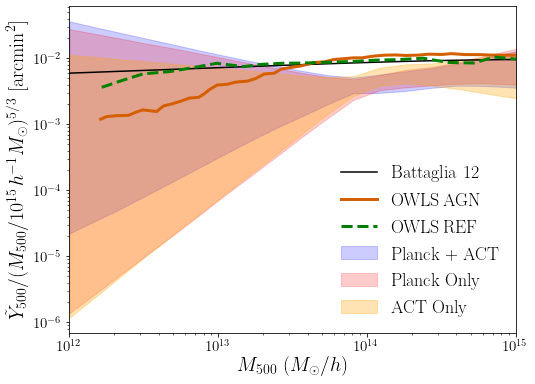

In [92]:
# pl.rc('text', usetex=False)
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df2 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_xipm_gtyPLonly_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
df3 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/YM_plot_data_xipm_gtyACTonly_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
percentiles = [16.0, 84.0]
z = 0.25
h = 0.7
ym_agn8_data = np.genfromtxt('YM_AGN8.dat', delimiter = ',')
ym_agn85_data = np.genfromtxt('YM_AGN8.5.dat', delimiter = ',')
ym_ref_data = np.genfromtxt('YM_REF.dat', delimiter = ',')
colors = ['blue']
alpha_list = [0.2, 0.2, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']
scaling = (df1['M']/1.0e15)**(-5./3.)  

fig, ax = pl.subplots(1, 1, figsize=(8, 6))
ax.fill_between(df1['M'], df1['YM_low']*scaling, df1['YM_high']*scaling, color='blue', alpha=alpha_list[0], label = 'Planck + ACT')
ax.fill_between(df2['M'], df2['YM_low']*scaling, df2['YM_high']*scaling, color='red', alpha=alpha_list[1], label = 'Planck Only')
ax.fill_between(df3['M'], df3['YM_low']*scaling, df3['YM_high']*scaling, color='orange', alpha=alpha_list[2], label = 'ACT Only')

ax.plot(df1['M'], df1['YM_fid']*scaling, color='k', alpha=1.0, label = 'Battaglia 12')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{\rm 500} \ (M_{\odot}/h)$', size=20)

ax.set_ylabel(r'$ \tilde{Y}_{500} / (M_{500}/10^{15} \,h^{-1} M_{\odot} )^{5/3} \ [\rm{arcmin}^2 ]$', size=20)


ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

Colors = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

if (0):
    ax.plot(ym_agn8_data[:,0]*h, ym_agn8_data[:,1], label = r'${\rm OWLS \, AGN}$', lw = 2, color  = Colors[0])
#     ax.plot(ym_agn85_data[:,0]*h, ym_agn85_data[:,1], label =  r'${\rm AGN8.5}$', lw = 2, ls = 'dashed', color = Colors[1])
    ax.plot(ym_ref_data[:,0]*h, ym_ref_data[:,1], label =  r'${\rm OWLS \, REF}$', lw = 2, ls = 'dotted', color = Colors[2])
if (1):
    ax.plot(ym_agn8_data[:,0]*h, ym_agn8_data[:,1]/(ym_agn8_data[:,0]*h/1.0e15)**(5./3.), label = r'${\rm OWLS \, AGN}$', lw = 3, color  = Colors[2])
#     ax.plot(ym_agn85_data[:,0]*h, ym_agn85_data[:,1]/(ym_agn85_data[:,0]*h/1.0e15)**(5/3.), label =  r'${\rm AGN8.5}$', lw = 3, ls = 'dashed', color = Colors[1])
    ax.plot(ym_ref_data[:,0]*h, ym_ref_data[:,1]/(ym_ref_data[:,0]*h/1.0e15)**(5./3.), label =  r'${\rm OWLS \, REF}$', lw = 3, ls = 'dashed', color = 'green')

ax.set_xlim((1.0e12, 1.0e15))

legend = ax.legend(fontsize=18, frameon=False, loc = 'lower right')
fig.savefig('YM_break_model_consistency.pdf')




In [86]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True




def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)




/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  if __name__ == '__main__':


wl_photoz_errors--bias_1: [0.02723448]
wl_photoz_errors--bias_2: [-0.00461761]
wl_photoz_errors--bias_3: [-0.00695365]
wl_photoz_errors--bias_4: [0.00914952]
shear_calibration_parameters--m1: [0.00406968]
shear_calibration_parameters--m2: [-0.00984791]
shear_calibration_parameters--m3: [-0.02641251]
shear_calibration_parameters--m4: [-0.03518174]
halo_model_parameters--a: [1.13729627]
halo_model_parameters--eta_0: [0.30157305]
theory_yx--p0-a_m--0: [26.26143998]
theory_yx--beta-a_m--0: [4.78779111]
theory_yx--p0-alpha_z--0: [-3.25795456]
theory_yx--a_ia--0: [1.14511868]
theory_yx--eta_ia--0: [-2.35765066]
theory_yx--ky_alpha_1h2h_model--1: [0.91645813]
theory_yx--ky_alpha_1h2h_model--2: [0.88153032]
theory_yx--ky_alpha_1h2h_model--3: [0.78504008]
theory_yx--ky_alpha_1h2h_model--4: [0.72020664]
prior: [18.86861887]
post: [-93.32986383]
weight: [0.00188192]
Removed no burn in
nsamp  =  686
data shape =  (686, 7)
weights shape =  (686,)
param names =  ['halo_model_parameters--a' 'halo_mod

<Figure size 1008x756 with 0 Axes>

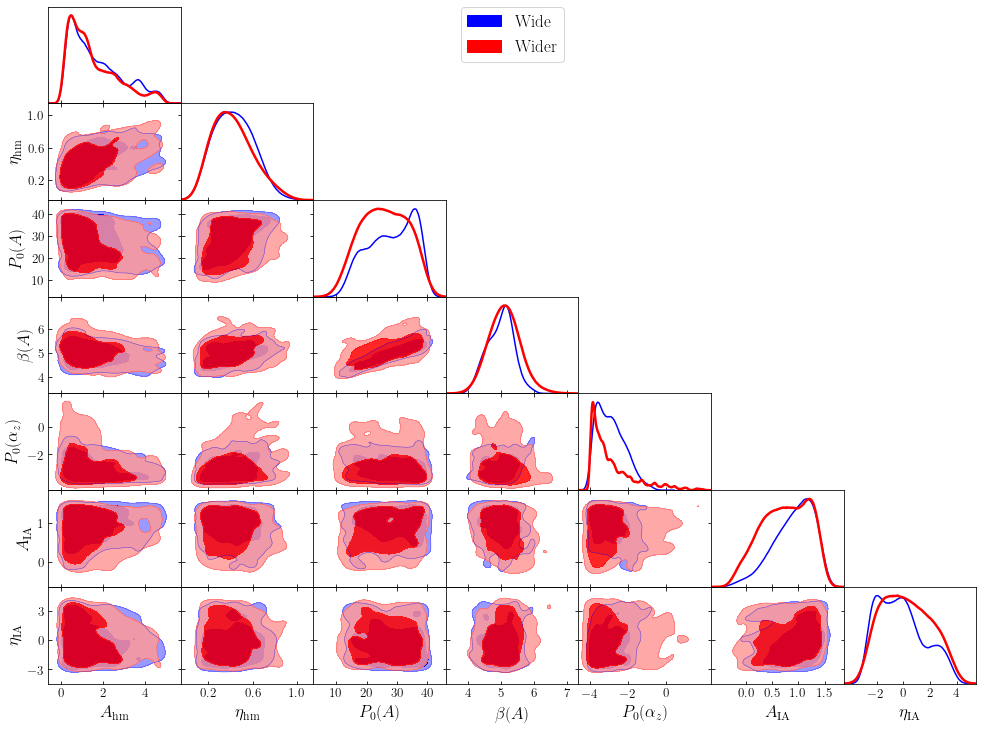

In [5]:
filename_list = [
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_plancky3_b12_p0am_sc_gtyfid_xipxim_all_wide_emcee.txt',  
#                  '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_b12_p0am_sc_gtyfid_xipxim_all_wide_emcee.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_sc_gtyfid_wide_emcee.txt'
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_brokenhigh_sc_gtyfid_wide_emcee.txt', 
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_brokenhigh_sc_gtyfid_wider_emcee.txt'
    '/global/cfs/cdirs/des/data_actxdes/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_al1h2h_PLcosmo_finalrun.txt',
    '/global/cfs/cdirs/des/data_actxdes/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt'    
]     
legend_labels = ['Wide','Wider']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$','theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     nsample = get_nsample(filename)
    nsample = int(1*np.loadtxt(filename).shape[0]/2)
    data = np.loadtxt(filename)[-nsample:,:]
#     weights = np.loadtxt(filename)[-nsample:,-1]
    weights = np.ones(nsample)
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-2]
    ind_max = np.where(likef == np.amax(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,True], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






wl_photoz_errors--bias_1: [0.01219488]
wl_photoz_errors--bias_2: [-0.01758341]
wl_photoz_errors--bias_3: [-0.00375476]
wl_photoz_errors--bias_4: [0.00819151]
shear_calibration_parameters--m1: [-0.00430897]
shear_calibration_parameters--m2: [-0.02076863]
shear_calibration_parameters--m3: [-0.03251222]
shear_calibration_parameters--m4: [-0.03882279]
halo_model_parameters--a: [1.97897671]
halo_model_parameters--eta_0: [0.35908869]
theory_yx--a_ia--0: [-0.1972824]
theory_yx--eta_ia--0: [-1.90698217]
DATA_VECTOR--2PT_CHI2: [338.27359346]
prior: [22.98722723]
like: [-169.13679673]
post: [-146.1495695]
weight: [0.00744678]
Removed no burn in
nsamp  =  903
data shape =  (903, 4)
weights shape =  (903,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$A_{\\rm IA}$' '$\\eta_{\\rm IA}$']


<Figure size 1008x756 with 0 Axes>

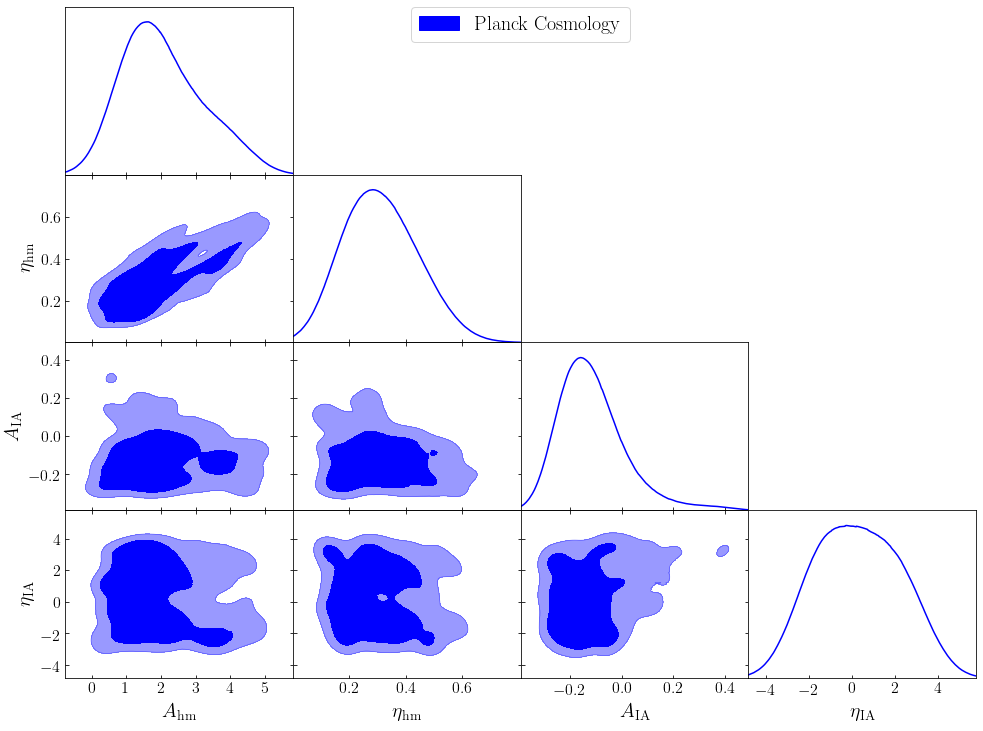

In [8]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gtyACTonly_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = ['Planck Cosmology','DES Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [9]:
441-116

325

wl_photoz_errors--bias_1: [0.01219488]
wl_photoz_errors--bias_2: [-0.01758341]
wl_photoz_errors--bias_3: [-0.00375476]
wl_photoz_errors--bias_4: [0.00819151]
shear_calibration_parameters--m1: [-0.00430897]
shear_calibration_parameters--m2: [-0.02076863]
shear_calibration_parameters--m3: [-0.03251222]
shear_calibration_parameters--m4: [-0.03882279]
halo_model_parameters--a: [1.97897671]
halo_model_parameters--eta_0: [0.35908869]
theory_yx--a_ia--0: [-0.1972824]
theory_yx--eta_ia--0: [-1.90698217]
DATA_VECTOR--2PT_CHI2: [338.27359346]
prior: [22.98722723]
like: [-169.13679673]
post: [-146.1495695]
weight: [0.00744678]
Removed no burn in
nsamp  =  903
data shape =  (903, 4)
weights shape =  (903,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$A_{\\rm IA}$' '$\\eta_{\\rm IA}$']


wl_photoz_errors--bias_1: [0.03801678]
wl_photoz_errors--bias_2: [0.00775958]
wl_photoz_errors--bias_3: [0.00040938]
wl_photoz_errors--bias_4: [0.00204676]
shear_calibration_parameters--m1: [-0.01468857]
shear_calibration_parameters--m2: [-0.00792972]
shear_calibration_parameters--m3: [-0.0382275]
shear_calibration_parameters--m4: [-0.03481042]
halo_model_parameters--a: [0.45389337]
halo_model_parameters--eta_0: [-0.04659688]
theory_yx--a_ia--0: [-1.1001188]
theory_yx--eta_ia--0: [3.96212189]
DATA_VECTOR--2PT_CHI2: [335.12482335]
prior: [17.05761258]
like: [-167.56241167]
post: [-150.50479909]
weight: [0.00374033]
Removed no burn in
nsamp  =  2758
data shape =  (2758, 4)
weights shape =  (2758,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$A_{\\rm IA}$' '$\\eta_{\\rm IA}$']


<Figure size 1008x756 with 0 Axes>

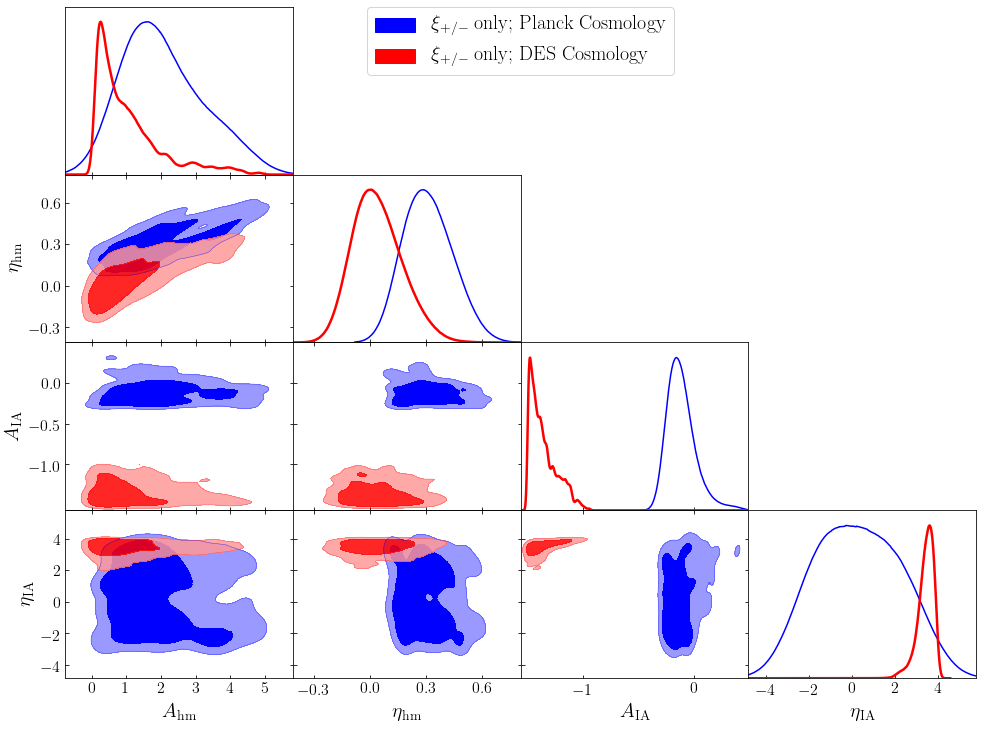

In [90]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_fidcuts_HM_delz_m_IA_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_fidcuts_HM_delz_m_IA_al1_DEScosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = [r'$\xi_{+/-}$ only; Planck Cosmology',r'$\xi_{+/-}$ only; DES Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






wl_photoz_errors--bias_1: [0.00872762]
wl_photoz_errors--bias_2: [-0.00449619]
wl_photoz_errors--bias_3: [-0.00433677]
wl_photoz_errors--bias_4: [0.00397363]
shear_calibration_parameters--m1: [-0.01070074]
shear_calibration_parameters--m2: [-0.01198633]
shear_calibration_parameters--m3: [-0.02370794]
shear_calibration_parameters--m4: [-0.02362904]
halo_model_parameters--a: [0.73452319]
halo_model_parameters--eta_0: [0.42667296]
theory_yx--p0-a_m--0: [24.80285249]
theory_yx--p0-alpha_z--0: [-3.74655918]
theory_yx--a_ia--0: [0.29936191]
theory_yx--eta_ia--0: [-2.47246958]
DATA_VECTOR--2PT_CHI2: [144.92637521]
prior: [16.75877248]
like: [-72.46318761]
post: [-55.70441513]
weight: [0.00117862]
Removed no burn in
nsamp  =  1020
data shape =  (1020, 6)
weights shape =  (1020,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_z--0' 'theory_yx--a_ia--0'
 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{

<Figure size 1008x756 with 0 Axes>

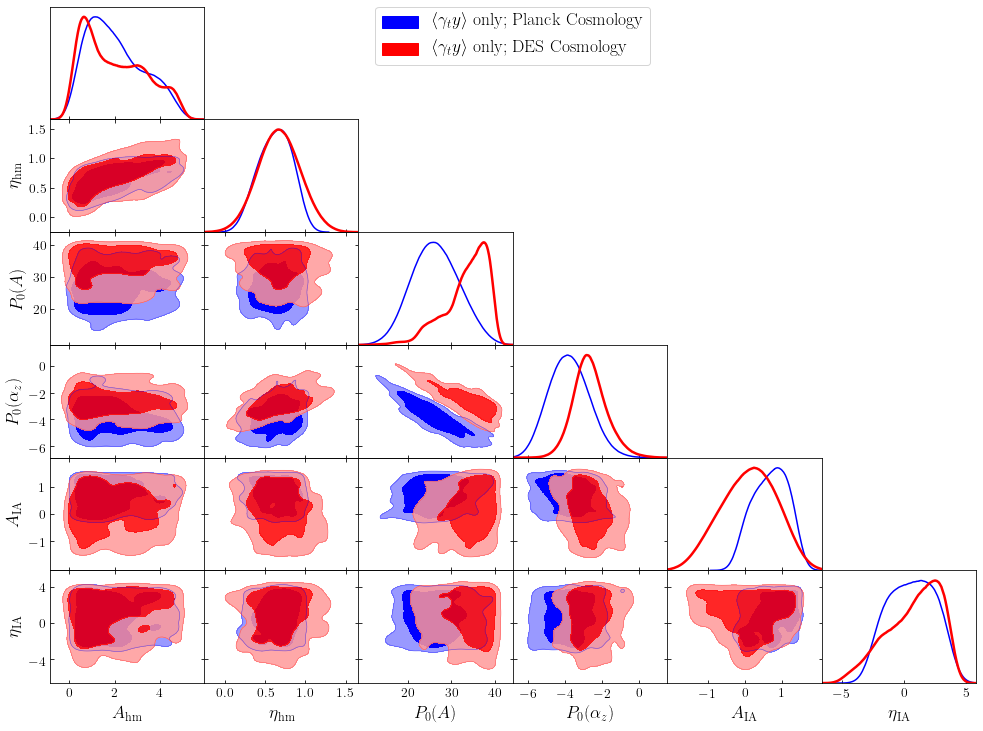

In [89]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = [r'$\langle \gamma_t y \rangle$ only; Planck Cosmology',r'$\langle \gamma_t y \rangle$ only; DES Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






wl_photoz_errors--bias_1: [0.00399572]
wl_photoz_errors--bias_2: [-0.03010738]
wl_photoz_errors--bias_3: [-0.00787894]
wl_photoz_errors--bias_4: [-0.01289166]
shear_calibration_parameters--m1: [0.00638184]
shear_calibration_parameters--m2: [-0.02620323]
shear_calibration_parameters--m3: [-0.01784421]
shear_calibration_parameters--m4: [-0.04182416]
halo_model_parameters--a: [0.43562033]
halo_model_parameters--eta_0: [0.10509802]
theory_yx--p0-a_m--0: [20.72765054]
theory_yx--p0-alpha_z--0: [-3.76572394]
theory_yx--a_ia--0: [-0.18447336]
theory_yx--eta_ia--0: [-0.8167168]
DATA_VECTOR--2PT_CHI2: [490.13436114]
prior: [14.73113186]
like: [-245.06718057]
post: [-230.33604871]
weight: [0.00247338]
Removed no burn in
nsamp  =  2026
data shape =  (2026, 6)
weights shape =  (2026,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_z--0' 'theory_yx--a_ia--0'
 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta

wl_photoz_errors--bias_1: [0.03529398]
wl_photoz_errors--bias_2: [0.00763112]
wl_photoz_errors--bias_3: [0.00033084]
wl_photoz_errors--bias_4: [0.00613004]
shear_calibration_parameters--m1: [-0.00765622]
shear_calibration_parameters--m2: [-0.01114869]
shear_calibration_parameters--m3: [-0.02595854]
shear_calibration_parameters--m4: [-0.02341088]
halo_model_parameters--a: [0.30826913]
halo_model_parameters--eta_0: [0.01525457]
theory_yx--p0-a_m--0: [35.65702157]
theory_yx--p0-alpha_z--0: [-4.55156987]
theory_yx--a_ia--0: [-1.39013074]
theory_yx--eta_ia--0: [3.5683133]
DATA_VECTOR--2PT_CHI2: [509.06570232]
prior: [12.84619453]
like: [-254.53285116]
post: [-241.68665663]
weight: [0.00303159]
Removed no burn in
nsamp  =  2748
data shape =  (2748, 6)
weights shape =  (2748,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_z--0' 'theory_yx--a_ia--0'
 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\

<Figure size 1008x756 with 0 Axes>

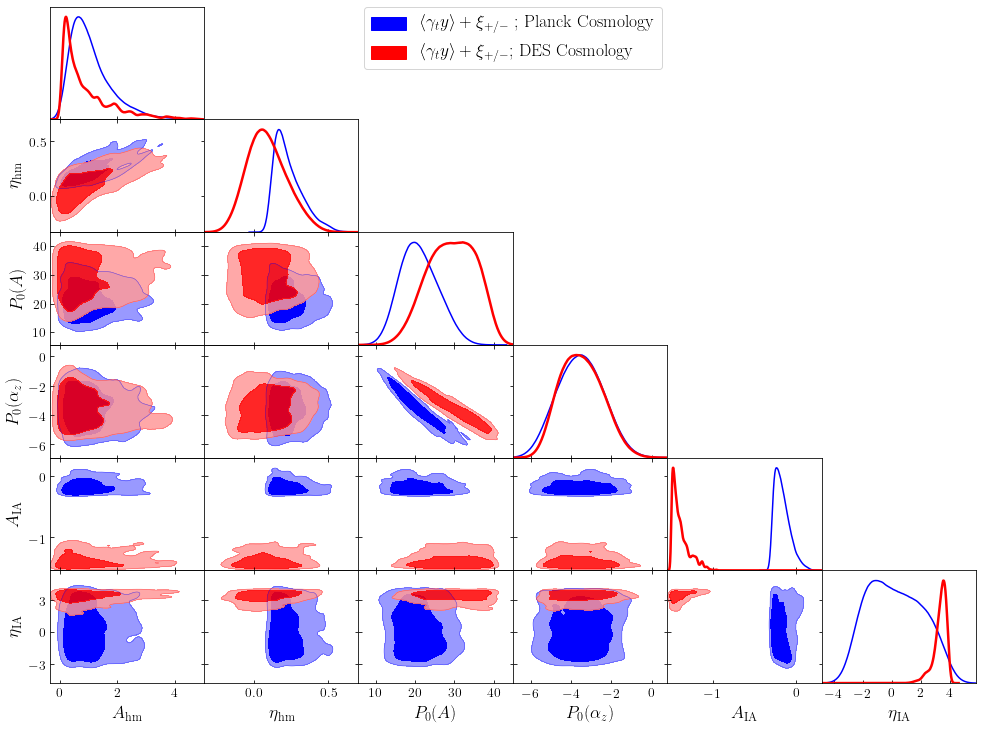

In [92]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_ACTonly_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

legend_labels = [r'$\langle \gamma_t y \rangle + \xi_{+/-}$ ; Planck Cosmology',r'$\langle \gamma_t y \rangle + \xi_{+/-}$; DES Cosmology','ACT only','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






wl_photoz_errors--bias_1: [0.00505599]
wl_photoz_errors--bias_2: [0.0024707]
wl_photoz_errors--bias_3: [-0.00168386]
wl_photoz_errors--bias_4: [0.00172574]
shear_calibration_parameters--m1: [-0.00515833]
shear_calibration_parameters--m2: [-0.01830948]
shear_calibration_parameters--m3: [-0.03008899]
shear_calibration_parameters--m4: [-0.0375052]
halo_model_parameters--a: [0.70320955]
halo_model_parameters--eta_0: [0.32639116]
theory_yx--p0-a_m--0: [30.30847873]
theory_yx--p0-alpha_z--0: [-4.92024131]
theory_yx--a_ia--0: [0.87232148]
theory_yx--eta_ia--0: [1.25410688]
DATA_VECTOR--2PT_CHI2: [145.6679289]
prior: [18.76119456]
like: [-72.83396445]
post: [-54.07276989]
weight: [0.00081348]
Removed no burn in
nsamp  =  1020
data shape =  (1020, 6)
weights shape =  (1020,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--p0-a_m--0' 'theory_yx--p0-alpha_z--0' 'theory_yx--a_ia--0'
 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm 

<Figure size 1008x756 with 0 Axes>

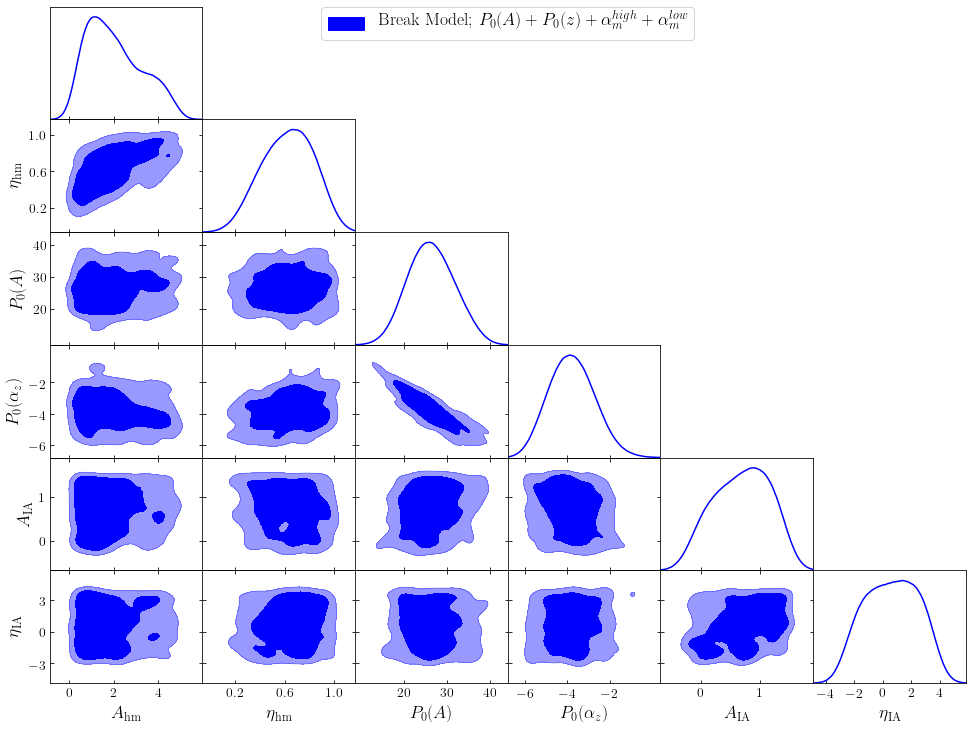

In [77]:
filename_list = [
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun3.txt',  
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_y3cuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_xipm_gty_y3cuts_HM_delz_m_IA_P0A_P0z_al1_PLcosmo_finalrun2.txt'
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt',
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_betaA_PLcosmo_finalrun.txt',        
]     

# legend_labels = [r'$\langle \gamma_t y \rangle$ only',r'$\xi_{+} + \xi_{-}$ only',r'$\langle \gamma_t y \rangle + \xi_{+} + \xi_{-} $','Polychord']
legend_labels = [r'Break Model; $P_0(A) + P_0(z) + \alpha^{high}_m + \alpha^{low}_m$',r'Simple Model; $P_0(A) + P_0(z)$',r'$\langle \gamma_t y \rangle + \xi_{+} + \xi_{-} $','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
#     likef = (np.loadtxt(filename)[-nsample:,-2] - np.loadtxt(filename)[-nsample:,-4])*(-2)
    likef = np.loadtxt(filename)[-nsample:,-2]*-1
    ind_max = np.where(likef == np.amin(likef))[0]
    
    
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [16]:
490/441


1.1111111111111112

In [17]:
np.sqrt(2/430)


0.06819943394704735

In [95]:
np.logspace(np.log10(2.5),np.log10(250),20)


array([  2.5       ,   3.18568746,   4.05944185,   5.1728452 ,
         6.59162725,   8.39954572,  10.703331  ,  13.63898695,
        17.3798199 ,  22.14666976,  28.22094729,  35.96124721,
        45.82451777,  58.39303673,  74.40878604,  94.81725477,
       120.82325596, 153.96205277, 196.18999259, 250.        ])

wl_photoz_errors--bias_1: [0.02963805]
wl_photoz_errors--bias_2: [-0.00448513]
wl_photoz_errors--bias_3: [-9.27789467e-05]
wl_photoz_errors--bias_4: [-0.01380015]
shear_calibration_parameters--m1: [-0.00728382]
shear_calibration_parameters--m2: [-0.01316761]
shear_calibration_parameters--m3: [-0.02108261]
shear_calibration_parameters--m4: [-0.03104418]
halo_model_parameters--a: [0.97430338]
halo_model_parameters--eta_0: [0.16046908]
theory_yx--hydro_mb--1: [2.67026942]
theory_yx--hydro_mb--2: [2.40012154]
theory_yx--hydro_mb--3: [2.42926091]
theory_yx--hydro_mb--4: [2.37269428]
theory_yx--a_ia--0: [-0.11128299]
theory_yx--eta_ia--0: [-2.37379365]
DATA_VECTOR--2PT_CHI2: [522.1081938]
prior: [19.93040703]
like: [-261.0540969]
post: [-241.12368988]
weight: [0.00199119]
Removed no burn in
nsamp  =  1935
data shape =  (1935, 8)
weights shape =  (1935,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--hydro_mb--1' 'theory_yx--hydro_mb--2'
 'theory_yx--hy

wl_photoz_errors--bias_1: [-0.00114976]
wl_photoz_errors--bias_2: [-0.01133264]
wl_photoz_errors--bias_3: [0.00686325]
wl_photoz_errors--bias_4: [0.00074258]
shear_calibration_parameters--m1: [-0.01704281]
shear_calibration_parameters--m2: [-0.01637388]
shear_calibration_parameters--m3: [-0.00530252]
shear_calibration_parameters--m4: [-0.016876]
halo_model_parameters--a: [1.04076922]
halo_model_parameters--eta_0: [0.13270572]
theory_yx--hydro_mb--0: [1.83586037]
theory_yx--a_ia--0: [-0.28953051]
theory_yx--eta_ia--0: [-2.90916842]
DATA_VECTOR--2PT_CHI2: [570.2382085]
prior: [16.3605939]
like: [-285.11910425]
post: [-268.75851035]
weight: [0.00329957]
Removed no burn in
nsamp  =  2610
data shape =  (2610, 5)
weights shape =  (2610,)
param names =  ['halo_model_parameters--a' 'halo_model_parameters--eta_0'
 'theory_yx--hydro_mb--0' 'theory_yx--a_ia--0' 'theory_yx--eta_ia--0']
param names fancy =  ['$A_{\\rm hm}$' '$\\eta_{\\rm hm}$' '$B$' '$A_{\\rm IA}$'
 '$\\eta_{\\rm IA}$']


<Figure size 1008x756 with 0 Axes>

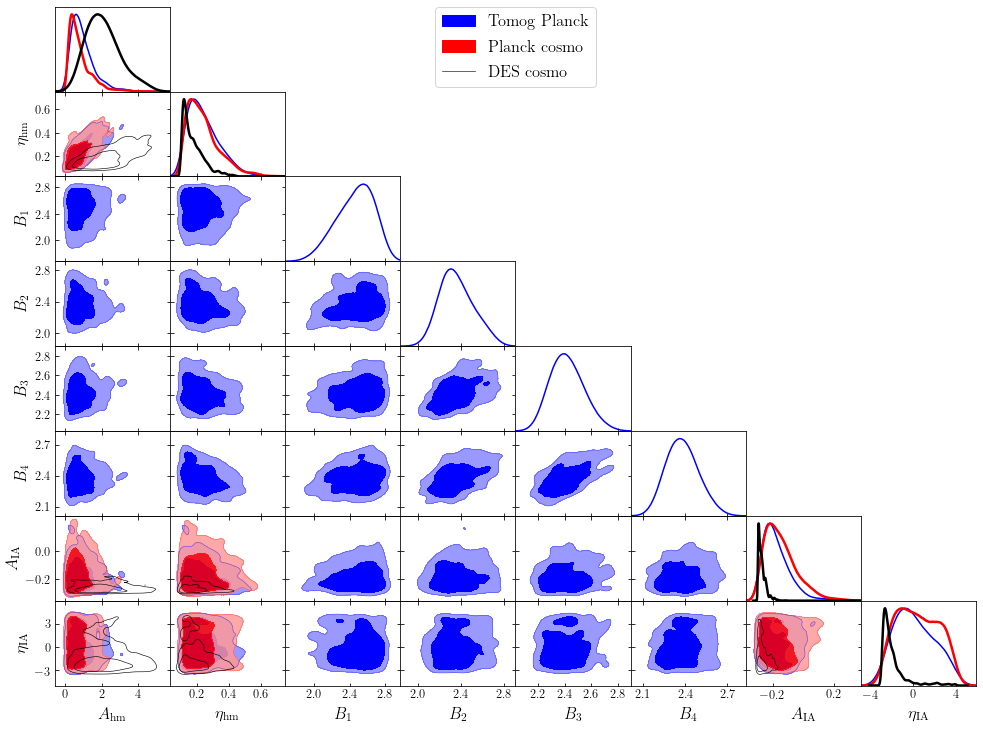

In [11]:
filename_list = [
#     '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt',
#         '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1_PLcosmo_finalrun.txt'
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_tomoBhse_al1_PLcosmo_corr_finalrun3.txt',
'/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_Bhse_al1_PLcosmo_wide_finalrun3.txt' ,
    '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/chain_gty_xip_xim_fidcuts_HM_delz_m_IA_Bhse_al1_DEScosmo_finalrun3.txt' 
]     

legend_labels = ['Tomog Planck','Planck cosmo','DES cosmo','Polychord']
ext_b1b2 = [0,0,0]

all_data = []
all_samples = []


fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0(A)$','theory_yx--p0-alpha_z--0':r'$P_0(\alpha_z)$','theory_yx--beta-a_m--0':r'$\beta(A)$',
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$',
                    'theory_yx--beta--0':r'$\beta$'	,'theory_yx--hydro_mb--0':r'$B$',
                    'theory_yx--hydro_mb--1':r'$B_1$','theory_yx--hydro_mb--2':r'$B_2$','theory_yx--hydro_mb--3':r'$B_3$',
                    'theory_yx--hydro_mb--4':r'$B_4$',
                    'theory_yx--p0-alpha_m--0':r'$\alpha_{\rm high}$',	'theory_yx--alpha_p_high--0':r'$\alpha_{\rm low}$',  
                    'theory_yx--beta-alpha_z--0':r'$\beta(\alpha_z)$','halo_model_parameters--a':r'$A_{\rm hm}$','halo_model_parameters--eta_0':r'$\eta_{\rm hm}$',
                   'theory_yx--a_ia--0':r'$A_{\rm IA}$', 'theory_yx--eta_ia--0':r'$\eta_{\rm IA}$',
                   'theory_yx--ky_alpha_1h2h_model--1':r'$\alpha_1$','theory_yx--ky_alpha_1h2h_model--2':r'$\alpha_2$',
                   'theory_yx--ky_alpha_1h2h_model--3':r'$\alpha_3$','theory_yx--ky_alpha_1h2h_model--4':r'$\alpha_4$',
                   'theory_yx--ky_alpha_1h2h_model--5':r'$\alpha_5$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
#     if fi == 0:
#         nsample = int(1*np.loadtxt(filename).shape[0]/2)
#         weights = np.ones(nsample)
#     else:
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    weights = np.loadtxt(filename)[-nsample:,-1]
        
    data = np.loadtxt(filename)[-nsample:,:]    
    param_names = get_param_names(filename)
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    likef = np.loadtxt(filename)[-nsample:,-5]
    ind_max = np.where(likef == np.amin(likef))[0]
    if len(ind_max) > 1:
        ind_max = ind_max[0]
#     print(data[ind_max,:])
#     print(selection)
    for jp in range(len(param_names)):
        print(param_names[jp] + ': ' + str(data[ind_max,jp]))
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy,settings={'smooth_scale_2D':0.3})
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =14)
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.84305 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.84305,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'black'}],contour_lws=[1.5],  filled = [True,  True,False], contour_colors = ['blue','red','black'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  

# g.export(fname = 'compare_cosmo_extprior_44_NLbiasDV.pdf')






In [80]:
import copy
def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
    return param_names


def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_nvar(filename):
    with open(filename, "r") as fi:
        for ln in fi:
            if ln.startswith("#n_varied="):
                nvar = int(ln[10:12])
    return nvar


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names

def create_values_file(first_line,bestfit_values_all,savefile_name,bias_name,chi2_vals=None,fix_cosmo=False, nvar_tot = None,bias_section_name=None):
    first_line_split = first_line.split()

    first_line_split_cut = first_line_split
    bestfit_values_all_cut = bestfit_values_all

    first_element_split = list(first_line_split_cut[0])
    first_line_split_cut[0] = ''.join(first_element_split[1:])
    first_line_split_cut = first_line_split_cut[:nvar_tot]

    section_param_dict = {}
    bestfit_param_dict = {}

    bins_in_bestfit = []

    k = 0
    
    for j in range(len(first_line_split_cut)):
        ln = list(first_line_split_cut[j])
        ln_cut_ind = ln.index('-')
        section_name = ''.join(ln[:ln_cut_ind])
        vary_param_name_split = ln[ln_cut_ind + 2:]
        vary_param_name = ''.join(vary_param_name_split)
        print(section_name, vary_param_name)
        if section_name in section_param_dict.keys():
            current_param_array = copy.deepcopy(section_param_dict[section_name])
            current_param_array.append(vary_param_name)
            section_param_dict[section_name] = current_param_array
            bestfit_param_array = copy.deepcopy(bestfit_param_dict[section_name])
            bestfit_param = bestfit_values_all_cut[k]
            bestfit_param_array.append(bestfit_param)
            bestfit_param_dict[section_name] = bestfit_param_array
        else:
            section_param_dict[section_name] = [vary_param_name]
            bestfit_param = bestfit_values_all_cut[k]
            bestfit_param_dict[section_name] = [bestfit_param]
        k += 1

    section_names = list(section_param_dict.keys())
    f = open(savefile_name,'w')
    
    for j in range(len(section_names)):
        f.write('[' + section_names[j] + ']' + '\n')
        param_vary_names = section_param_dict[section_names[j]]
        param_vary_vals = bestfit_param_dict[section_names[j]]

        for i in range(len(param_vary_names)):
            f.write(param_vary_names[i] + '=' + str(param_vary_vals[i]) + '\n')
        

    f.close()

    return 0






In [81]:
ldir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/chains/'
# ldir = '/global/cfs/cdirs/des/data_actxdes/'
# filename = ldir + 'chain_sz_shear_planckacty3_gtyonly_b12_p0am_wz_sc_gtyfid_wide_emcee.txt'
# filename = ldir + 'chain_gty_only_HM_delz_m_IA_P0A_P0z_betaA_betaz_al1h2h_PLcosmo_finalrun.txt'
filename = ldir + 'chain_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.txt'
sdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/values/'
bestfit_file_name = sdir + 'MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_al1_DEScosmo_widep_finalrun3.ini'  
infile = open(filename, 'r')
first_line = infile.readline()
nsample = np.loadtxt(filename).shape[0]
data = np.loadtxt(filename)[-nsample:,:-2]
# nsample = get_nsample(filename)
like_file = np.loadtxt(filename)[-nsample:,-2]
lnlike_max = np.amax(like_file)
ind_max = np.where(like_file == lnlike_max)[0][0]
print(ind_max,nsample)
print(lnlike_max)

bestfit_values = data[ind_max,:]
create_values_file(first_line, bestfit_values, bestfit_file_name, None, chi2_vals=None,fix_cosmo=True, nvar_tot = 15,bias_section_name='pk_to_cl') 






2716 2748
-240.178689675496
wl_photoz_errors bias_1
wl_photoz_errors bias_2
wl_photoz_errors bias_3
wl_photoz_errors bias_4
shear_calibration_parameters m1
shear_calibration_parameters m2
shear_calibration_parameters m3
shear_calibration_parameters m4
halo_model_parameters a
halo_model_parameters eta_0
theory_yx p0-a_m--0
theory_yx p0-alpha_z--0
theory_yx a_ia--0
theory_yx eta_ia--0
DATA_VECTOR 2PT_CHI2


0

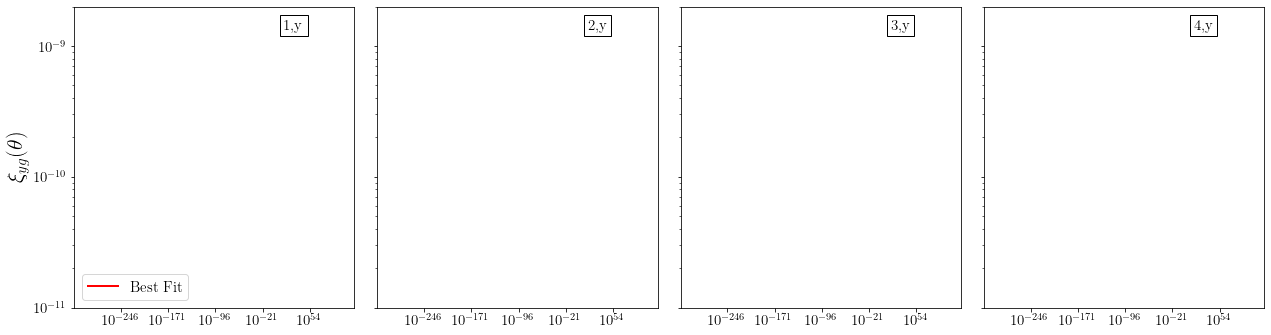

In [13]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
import scipy.interpolate as interpolate
ytype = 'planck'
# ytype = 'act'
do_residuals = 0



if ytype == 'planck':
    fnames = [
#         'DV_obj_temp_kk_gty_planck_act_y3_run1_b12_p0am_sc_gtyfid_xipxim_all_wide.pk', 
#         'DV_obj_temp_kk_gty_planck_act_gtyonly_saveDV.pk'
#         'DV_obj_temp_kk_gty_planck_act_p0am_wz_beamed_B12_saveDV_MAP.pk'
        'DV_obj_temp_all_halos_hy_hres.pk'
    ]
    yt = 1
    
    
labels = ['Best Fit','OWLS Ref','OWLS AGN']
colors = ['r','b','g']
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (18,5),sharex=True,sharey='row')


for j2 in range(4):
    for jf in range(len(fnames)):

        DV = dill.load(open(fdir + fnames[jf],'rb'))  

        jc = 0
        texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
        texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
        bin_str = 'bin_' + str(j2+1) + '_' + str(0)

        theta_array = DV.xi_result_dict['gy']['theta']
        Cl_j1_tot = DV.xi_result_dict['gy'][bin_str]['tot']

#         theta_array = DV.Cl_result_dict['l_array']
#         Cl_j1_tot = DV.Cl_result_dict['gy'][bin_str]['tot']
        
        
        ax[j2].errorbar(theta_array, Cl_j1_tot, linestyle='-', marker='',lw = 2, color =colors[jf],label=labels[jf])  


#         ax[j2].axvspan(0,sc[j2],alpha=0.2,color='k')
        ax[j2].set_xscale('log')

#         if do_residuals:
#             ax[j2].set_ylim(ylims)        
#         else:
        ax[j2].set_yscale('log')
        ax[j2].set_ylim(1e-11,2e-9)


#         ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#         ticks  = np.array([3,10,30,100])
#         labels_bottom = ticks
#         ax[j2].set_xticks(ticks)
#         ax[j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[j2].set_xlim((2,250))
        ax[j2].text( 0.75, 0.96,str(j2+1) + ',y', verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

    # ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
    if do_residuals:
        ax[0].set_ylabel(r'$\Delta \xi_{y\gamma_t}/\xi^{\rm bestfit}_{y\gamma_t}$ ', size = 22)
    else:
        ax[0].set_ylabel(r'$\xi_{yg}(\theta)$ ', size = 22)
    # ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
    # ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
    ax[0].legend(fontsize=15,loc='lower left')
#     ax[1].legend(fontsize=15,loc='lower left')
    #     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_sims_residual_' + str(ytype) + '.pdf')






In [9]:
Cl_j1_tot 


array([ 5.05780322e-10,  5.05784228e-10,  5.05789144e-10,  5.05795334e-10,
        5.05803126e-10,  5.05812935e-10,  5.05825283e-10,  5.05840829e-10,
        5.05860399e-10,  5.05885035e-10,  5.05916047e-10,  5.05955087e-10,
        5.06004232e-10,  5.06066094e-10,  5.06143964e-10,  5.06241980e-10,
        5.06365350e-10,  5.06520623e-10,  5.06716039e-10,  5.06961953e-10,
        5.07271386e-10,  5.07660694e-10,  5.08150417e-10,  5.08766331e-10,
        5.09540755e-10,  5.10514172e-10,  5.11737224e-10,  5.13273137e-10,
        5.15200761e-10,  5.17618039e-10,  5.20646308e-10,  5.24435207e-10,
        5.29168211e-10,  5.35068733e-10,  5.42405897e-10,  5.51499888e-10,
        5.62725189e-10,  5.76507935e-10,  5.93316352e-10,  6.13636166e-10,
        6.37925889e-10,  6.66542587e-10,  6.99628459e-10,  7.36944760e-10,
        7.77656300e-10,  8.20067261e-10,  8.61312086e-10,  8.97071724e-10,
        9.21446266e-10,  9.28294749e-10,  9.09626027e-10,  8.61492043e-10,
        7.93545814e-10,  

In [96]:
from astropy.io import fits
DVout = fits.open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/y3-3x2pt/data/des-y3/2pt_NG_final_2ptunblind_11_13_20_wnz.fits')  

cov = DVout['COVMAT'].data


In [101]:
cov_new_xipxim = cov[0:400,0:400]

DVorig = fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits')  
cov_orig = DVorig['COVMAT'].data

cov_old_xipxim = cov_orig[0:400,0:400]



In [102]:
(cov_new_xipxim - cov_old_xipxim)/cov_old_xipxim
 
 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:

with fits.open('/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/DES_planck_ACT_theorycov_updatedcov_finalrun3.fits', mode='update') as hdul:
    cov_orig = DVorig['COVMAT'].data
    cov_orig[0:400,0:400] = cov_new_xipxim
    hdul['COVMAT'].data = cov_orig
    hdul.flush()
    
    

In [43]:
fdir = '/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/results/'
percentiles = [16.0, 84.0]

colors = ['blue']
alpha_list = [0.3, 0.3, 0.3, 0.2, 0.2, 0.2]
labels = [r'Data']
linestyles = ['-']

DV1 = dill.load(open(fdir + 'DV_wyy_MAP_values_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))  
DV2 = dill.load(open(fdir + 'DV_wyy_fid_B12.pk','rb'))  






In [65]:
# DV1.Cl_result_dict.keys()
pl1 = np.loadtxt('planck_yy_fig18_central.txt', delimiter=',')
pl2 = np.loadtxt('planck_yy_fig18_lowerlim.txt', delimiter=',')
pl3 = np.loadtxt('planck_yy_fig18_upperlim.txt', delimiter=',')
ell_pl = pl1[:,0]
Dl_pl = pl1[:,1]*1e-12
err_high_pl = pl2[:,1]*1e-12 - Dl_pl
err_low_pl = Dl_pl - pl3[:,1]*1e-12



In [67]:
df1 = pk.load(open('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/plotting/Clyy_plot_data_xipm_gty_fidcuts_HM_delz_m_IA_P0A_P0z_P0m_alphigh_highbpl_al1_PLcosmo_finalrun3.pk','rb'))   



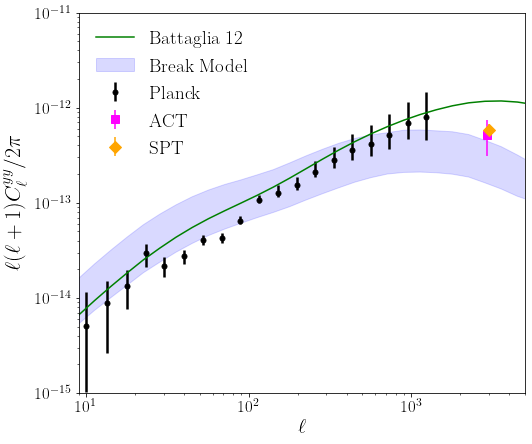

In [76]:
fig, ax = pl.subplots(1, 1, figsize=(8, 7))
# ell = DV1.Cl_result_dict['l_array']
# ax.plot(ell, (1./(2*np.pi))*(ell)*(ell+1) * DV2.Cl_result_dict['yy']['bin_0_0']['tot'], color='green', alpha=1.0, lw=2.5, label = 'Battaglia 12')
# ax.plot(ell, (1./(2*np.pi))*(ell)*(ell+1) * DV1.Cl_result_dict['yy']['bin_0_0']['tot'], color='black', alpha=1.0, lw=2.5,label = 'BestFit')
scaling = df1['l'] * (df1['l'] + 1) * (1./(2*np.pi))
ax.errorbar(ell_pl, Dl_pl,np.array([err_low_pl,err_high_pl]), color='black',ls='',marker='o', ms=5.0, alpha=1.0, lw=2.5,label = 'Planck')
vljv = 0.51819e-12
ax.errorbar([2928.3],[vljv],np.array([[vljv-0.3078e-12,0.7332e-12 - vljv]]).T,ls='',marker='s',ms='8',color='magenta',label='ACT')

vljv = 0.58116e-12
ax.errorbar([3024],[vljv],np.array([[vljv-0.4889e-12,0.676e-12 - vljv]]).T,ls='',marker='D',ms='8',color='orange',label='SPT')


ax.fill_between(df1['l'], scaling * df1['Clyy_low'], scaling * df1['Clyy_high'], color='blue', alpha=0.15, label = 'Break Model')
ax.plot(df1['l'], scaling * df1['Clyy_fid'], color='g', alpha=1.0, label = 'Battaglia 12')
ax.set_xlabel(r'$\ell$', size=20)
ax.set_ylabel(r'$\ell (\ell+1) C^{yy}_{\ell}/2\pi$', size=22)
ax.set_xlim(9,5e3) 
ax.set_ylim(1e-15,1e-11)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=17)
ax.tick_params(axis='both', which='minor', labelsize=17)


legend = ax.legend(fontsize=19, frameon=False, loc = 'upper left')
# fig.savefig('YM_buzzard_try.pdf')
# fig.savefig(save_plot_fname)


